<img src = 'Covid-Header-2.png' style = 'width: 1000px;'/>
<p style = 'text-align: center;'>https://www.usda.gov/coronavirus</p>

# Final Project: COVID in the U.S.

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

## First: COVID Cases and Deaths in the U.S.

In [2]:
covidDF = pd.read_csv('USCovid.csv')

In [3]:
# rename columns
covidDF.columns = ('Dates', 'Cases', 'Deaths')
# show first 5 rows
covidDF.head()

,Dates,Cases,Deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [4]:
# sort_values sorts on Cases first then Date, with Cases descending and Date ascending
# .head(10) to see the first 10 rows
covidDF.sort_values(['Cases', 'Dates'], ascending = [False, True]).head(10)

,Dates,Cases,Deaths
687,2021-12-08,49505304,791933
686,2021-12-07,49356263,790082
685,2021-12-06,49242271,788315
684,2021-12-05,49044822,786964
683,2021-12-04,49010250,786803
682,2021-12-03,48952109,786313
681,2021-12-02,48798864,784164
680,2021-12-01,48660145,782814
679,2021-11-30,48520788,780848
678,2021-11-29,48411494,779293


In [5]:
# use the query method to filter data and see when the cases of COVID exceed 10000000
covidDF[['Dates', 'Cases']].query('Cases >= 10000000')

,Dates,Cases
292,2020-11-08,10061218
293,2020-11-09,10191667
294,2020-11-10,10331417
295,2020-11-11,10474295
296,2020-11-12,10637946
...,...,...
683,2021-12-04,49010250
684,2021-12-05,49044822
685,2021-12-06,49242271
686,2021-12-07,49356263


In [6]:
# use the query method to filter data and see when the deaths of COVID exceed 100000
covidDF[['Dates', 'Deaths']].query('Deaths >= 100000')

,Dates,Deaths
127,2020-05-27,100422
128,2020-05-28,101622
129,2020-05-29,102812
130,2020-05-30,103775
131,2020-05-31,104379
...,...,...
683,2021-12-04,786803
684,2021-12-05,786964
685,2021-12-06,788315
686,2021-12-07,790082


<AxesSubplot:xlabel='Dates', ylabel='Deaths'>

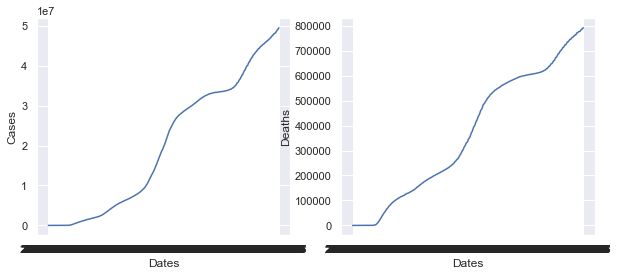

In [7]:
# adjust the size of the plot
sb.set(rc = {'figure.figsize':(10, 4)}) 
# show plot of Cases by Dates and plot of Deaths by Dates side by side
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = False)
sb.lineplot(x = 'Dates', y = 'Cases', data = covidDF[['Dates', 'Cases']], ax = ax1)
# lineplot: line plot
# x: Dates on the x-axis
# y: Cases on the y-axis
# data: source of my data
# ax1: the first plot
sb.lineplot(x = 'Dates', y = 'Deaths', data = covidDF[['Dates', 'Deaths']], ax = ax2)
# lineplot: line plot
# x: Dates on the x-axis
# y: Deaths on the y-axis
# data: source of my data
# ax2: the second plot

## Second: The Percentage of the Frequency of Mask Used by County

In [8]:
countyMaskDF = pd.read_csv('USCountyMask.csv')

In [9]:
# show first 5 rows
countyMaskDF.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


In [10]:
# use the query method to filter data and see the number of counties
# where the percentage of people always wearing mask is larger than 0.4
countyMaskDF.query('ALWAYS > 0.5')

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
3,1007,0.020,0.034,0.096,0.278,0.572
8,1017,0.117,0.037,0.150,0.136,0.560
9,1019,0.135,0.027,0.161,0.158,0.520
10,1021,0.060,0.070,0.058,0.194,0.618
11,1023,0.049,0.038,0.126,0.219,0.568
...,...,...,...,...,...,...
3090,55085,0.057,0.050,0.155,0.186,0.552
3097,55099,0.059,0.081,0.079,0.150,0.631
3098,55101,0.061,0.067,0.167,0.193,0.512
3110,55125,0.051,0.047,0.138,0.231,0.533


In [11]:
# use the query method to filter data and see the number of counties 
# where the percentage of people always wearing mask is less than and equal 0.4
countyMaskDF.query('ALWAYS < 0.3')

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
86,2188,0.035,0.188,0.051,0.474,0.252
138,5055,0.062,0.141,0.154,0.346,0.297
253,8017,0.016,0.187,0.106,0.398,0.292
276,8063,0.024,0.323,0.119,0.344,0.190
282,8075,0.078,0.202,0.101,0.368,0.251
...,...,...,...,...,...,...
3133,56029,0.189,0.153,0.191,0.205,0.262
3135,56033,0.170,0.251,0.099,0.203,0.278
3137,56037,0.061,0.295,0.230,0.146,0.268
3139,56041,0.098,0.278,0.154,0.207,0.264


In [12]:
# calculates the average percentage of each frequency
columns_mean = np.mean(countyMaskDF[['NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS']])
type(columns_mean)

pandas.core.series.Series

In [13]:
# convert series to dataframe
columnsMeanDF = columns_mean.to_frame()
columnsMeanDF

,0
NEVER,0.079940
RARELY,0.082919
SOMETIMES,0.121318
FREQUENTLY,0.207725
ALWAYS,0.508094


Text(0, 0.5, 'Average Percentage of Frequency')

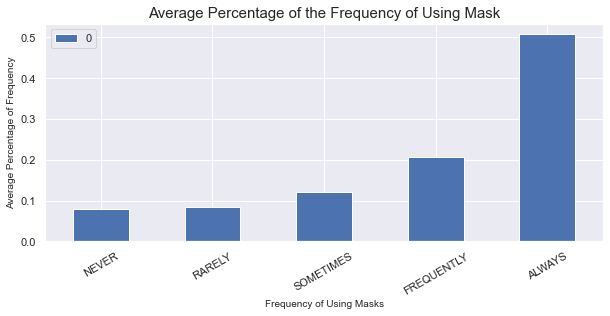

In [14]:
# plot the average percentage of each frequency using bar chart
columnsMeanDF.plot(kind = 'bar')
# rotate x-axis so that it is more easy to read
plt.xticks(rotation = 30, horizontalalignment = 'center')
# set up the plot title and the size of title
plt.title('Average Percentage of the Frequency of Using Mask', fontsize = 15)
# label x-axis and the size of x-label
plt.xlabel('Frequency of Using Masks', fontsize = 10)
# label y-axis and the size of x-label
plt.ylabel('Average Percentage of Frequency', fontsize = 10)

## Thrid: COVID Vaccine Tracker in the U.S.

In [15]:
vaccineDF = pd.read_csv('USVaccine.csv')

In [16]:
# rename columns
vaccineDF.columns = ('ID', 'Population', 'Name', 'DosesAdministered', 'PeopleVaccinated', 
                     'CompletedVaccination', 'CompletedOneDoseVaccination', 'BoosterDosesAdministered', 
                     'CDCDosesDistributed')
# show first 5 rows
vaccineDF.head()

,ID,Population,Name,DosesAdministered,PeopleVaccinated,CompletedVaccination,CompletedOneDoseVaccination,BoosterDosesAdministered,CDCDosesDistributed
0,AL,4903185.0,Alabama,5404729,2815260,2293071,152599.0,509236.0,7950160.0
1,AK,731545.0,Alaska,988502,467390,404816,36445.0,120768.0,1307165.0
2,AZ,7278717.0,Arizona,9951733,4766037,4051274,308913.0,959980.0,12120920.0
3,AR,3017804.0,Arkansas,3633569,1851780,1511115,105604.0,373771.0,4915190.0
4,CA,39512223.0,California,61965503,31730029,25484575,2011914.0,6409108.0,72676305.0


In [17]:
# using .groupby to get Completed Vaccination for each state
pecCompletedVaccineDF = vaccineDF.groupby(['ID', 'Population']).agg({'CompletedVaccination':sum})

In [18]:
# change row labels to be datapoints 
# so that we can calculate the percentage of Completed Vaccination for each state
pecCompletedVaccineDF = pecCompletedVaccineDF.reset_index()

In [19]:
# calculate the percentage of Completed Vaccination for each state
pecCompletedVaccineDF['Percentage'] = pecCompletedVaccineDF['CompletedVaccination']  / pecCompletedVaccineDF['Population']

In [20]:
# show pecCompletedVaccineDF
pecCompletedVaccineDF

,ID,Population,CompletedVaccination,Percentage
0,AK,731545.0,404816,0.553371
1,AL,4903185.0,2293071,0.467670
2,AR,3017804.0,1511115,0.500733
3,AS,55689.0,31594,0.567329
4,AZ,7278717.0,4051274,0.556592
5,CA,39512223.0,25484575,0.644980
6,CO,5758736.0,3722145,0.646348
7,CT,3565287.0,2611504,0.732481
8,DC,705749.0,464787,0.658573
9,DE,973764.0,610222,0.626663


In [21]:
# calculate the average percentage of Completed Vaccination for each state
np.mean(pecCompletedVaccineDF[['Percentage']])

Percentage    0.597997
dtype: float64

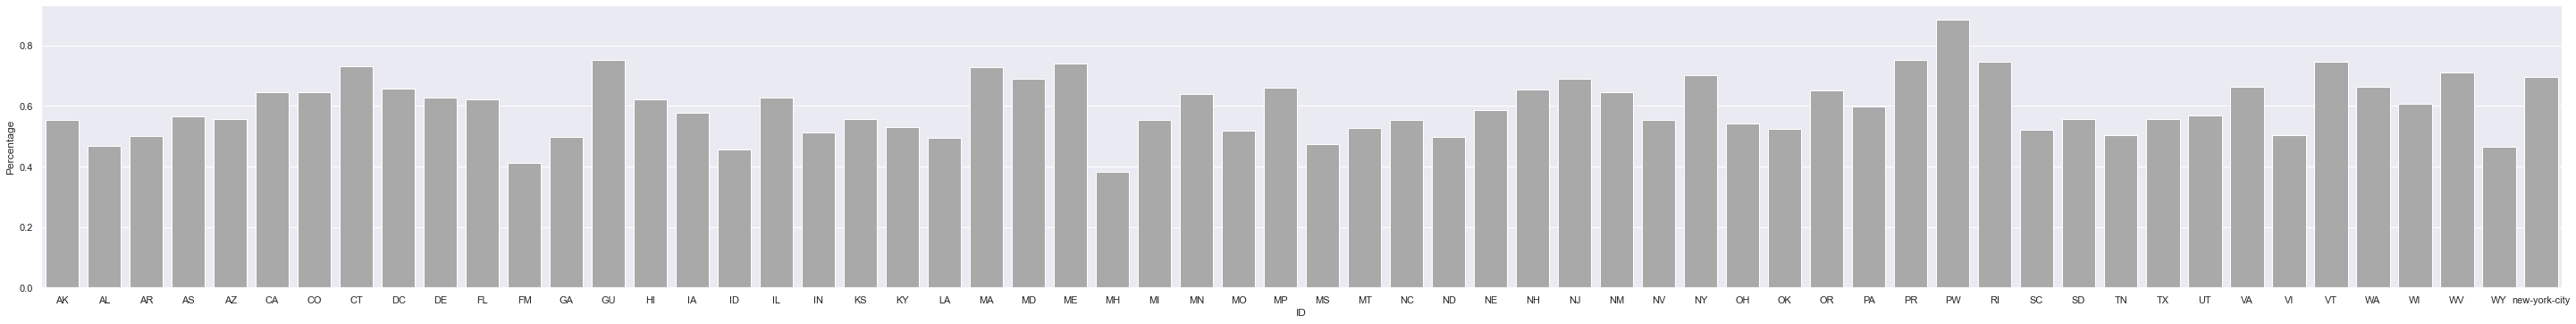

In [22]:
# plot pecCompletedVaccinePlot
pecCompletedVaccinePlot = sb.catplot(x = 'ID', y = 'Percentage', data = pecCompletedVaccineDF, 
                         kind = 'bar', aspect = 8, color = 'DarkGray')
# catlot: categorical plot
# x: ID on the x-axis
# y: Percentage on the y-axis
# data: source of my data
# kind: bar chart
# aspect: set up figure size
# color: DarkGray

## Fourth: Top Articles on Homepage of New York Times

In [23]:
# New York Times API
aKey = '5l5NVnbkeXyNDVdyfgnNs8O2lgxGvGYq'

In [24]:
topStoriesQuery = requests.get('https://api.nytimes.com/svc/topstories/v2/home.json?api-key=' + aKey).json()
# topstories/v2/home.json returns the top stories on the homepage

In [25]:
topStoriesQuery

{'status': 'OK',
 'copyright': 'Copyright (c) 2021 The New York Times Company. All Rights Reserved.',
 'section': 'home',
 'last_updated': '2021-12-12T02:00:26-05:00',
 'num_results': 59,
 'results': [{'section': 'us',
   'subsection': '',
   'title': 'Tornadoes Tear Through South and Midwest, With at Least 70 Dead in Kentucky',
   'abstract': 'Power was out across the region on Saturday, and severe storms were expected to continue.',
   'url': 'https://www.nytimes.com/2021/12/11/us/kentucky-deadly-tornadoes.html',
   'uri': 'nyt://article/cfce8019-d767-53e6-bc8e-b4a99fb5c071',
   'byline': 'By Rick Rojas, Jamie McGee, Laura Faith Kebede and Campbell Robertson',
   'item_type': 'Article',
   'updated_date': '2021-12-12T00:33:41-05:00',
   'created_date': '2021-12-11T21:31:54-05:00',
   'published_date': '2021-12-11T21:31:54-05:00',
   'material_type_facet': '',
   'kicker': '',
   'des_facet': ['Tornadoes',
    'Accidents and Safety',
    'Deaths (Fatalities)',
    'Buildings (Structur

In [26]:
# see the keys of the dictionary
topStoriesQuery.keys()

dict_keys(['status', 'copyright', 'section', 'last_updated', 'num_results', 'results'])

In [27]:
# see the keys of the dictionary
topStoriesQuery['results'][0].keys()

dict_keys(['section', 'subsection', 'title', 'abstract', 'url', 'uri', 'byline', 'item_type', 'updated_date', 'created_date', 'published_date', 'material_type_facet', 'kicker', 'des_facet', 'org_facet', 'per_facet', 'geo_facet', 'multimedia', 'short_url'])

In [28]:
# iterate through the list
for content in topStoriesQuery['results']:
    # turn list to string
    des_facetString = ''.join(content['des_facet'])
    
    # if the article is about COVID
    if des_facetString.find('Coronavirus') != -1:
        # print the title of each article
        print('\033[1m' + content['title'] + '\033[0m')
        print()
        # print the description facets of each article
        print(content['des_facet'])
        print()

As Vaccines Trickle into Africa, Zambia’s Challenges Highlight Other Obstacles

['Vaccination and Immunization', 'Coronavirus (2019-nCoV)', 'Rumors and Misinformation']

The End of a Return-to-Office Date

['Coronavirus Reopenings', 'Quarantine (Life and Culture)', 'Coronavirus Omicron Variant', 'Coronavirus (2019-nCoV)', 'Labor and Jobs', 'Workplace Hazards and Violations', 'Telecommuting']

We Can Live Better Lives While Being Smart About Covid

['Coronavirus Omicron Variant', 'Coronavirus Delta Variant', 'Disease Rates', 'Coronavirus (2019-nCoV)']

Why Hospitalizations Are Now a Better Indicator of Covid’s Impact

['Disease Rates', 'Coronavirus Delta Variant', 'Coronavirus (2019-nCoV)', 'Vaccination and Immunization']

Could the Great Resignation Help Workers? Take a Look at History.

['Labor and Jobs', 'Shortages', 'Strikes', 'Wages and Salaries', 'Coronavirus (2019-nCoV)']

Revoke the Omicron Travel Ban Against African Countries

['Coronavirus Omicron Variant', 'Travel Warnings', 

In [29]:
# iterate through the list
for content in topStoriesQuery['results']:
    # turn list to string
    des_facetString = ''.join(content['des_facet'])

    # if the article is not about COVID
    if des_facetString.find('Coronavirus') == -1:
        # print the title of each article
        print('\033[1m' + content['title'] + '\033[0m')
        print()
        # print the description facets of each article
        print(content['des_facet'])
        print()

Tornadoes Tear Through South and Midwest, With at Least 70 Dead in Kentucky

['Tornadoes', 'Accidents and Safety', 'Deaths (Fatalities)', 'Buildings (Structures)', 'Power Failures and Blackouts', 'Rescues']

In a Kentucky Town Hit by a Tornado, Anguish, Worry — and Feeling Grateful to Be Alive

['Candles', 'Tornadoes', 'Factories and Manufacturing']

Maps: Where the Tornadoes Struck, Destroying Buildings and Homes

['Tornadoes']

In Bid for Control of Elections, Trump Loyalists Face Few Obstacles

['Voter Fraud (Election Fraud)', 'Presidential Election of 2020', 'United States Politics and Government', 'Elections, Secretary of State']

Inside the Fall of Kabul

['Afghanistan War (2001- )', 'United States Defense and Military Forces', 'Diplomatic Service, Embassies and Consulates', 'United States International Relations', 'Evacuations and Evacuees', 'United States Politics and Government', 'Politics and Government']

The Documents You Need to Travel Abroad Now

['Content Type: Service',

Text(0, 0.5, 'Number of Articles')

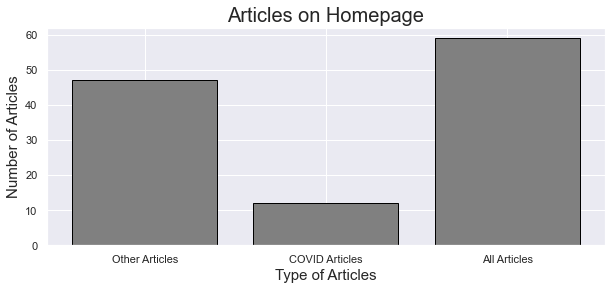

In [30]:
total = 0
covidTotal = 0
otherTotal = 0

# iterate through the list
for content in topStoriesQuery['results']:
    # add one for each article
    total += 1
    
    # turn list to string
    des_facetString = ''.join(content['des_facet'])
    
    # if the article is about COVID
    if des_facetString.find('Coronavirus') != -1:
        # add one to covidTotal
        covidTotal += 1
    
    # if the article is not about COVID
    if des_facetString.find('Coronavirus') == -1:
        # add one to covidTotal
        otherTotal += 1

# create a list of type of articels
articles = ['Other Articles', 'COVID Articles', 'All Articles']
# create a list of number of articles
totalArticles = [otherTotal, covidTotal, total]

# plot a bar chart using two lists above
plt.bar(articles, totalArticles, color = 'gray', edgecolor = 'black')
# set up the plot title
plt.title('Articles on Homepage', fontsize = 20)
# label x-axis
plt.xlabel('Type of Articles', fontsize = 15)
# label y-axis
plt.ylabel('Number of Articles', fontsize = 15)

## Fifth: Most Viewed Articles in 7 Days on New York Times

In [31]:
viewed7DaysQuery = requests.get('https://api.nytimes.com/svc/mostpopular/v2/viewed/7.json?api-key=' + aKey).json()
# mostpopular/v2/viewed/7.json returns the most viewed articles in 7 days

In [32]:
viewed7DaysQuery

{'status': 'OK',
 'copyright': 'Copyright (c) 2021 The New York Times Company.  All Rights Reserved.',
 'num_results': 20,
 'results': [{'uri': 'nyt://article/a5c580a1-d38f-5d9c-9ec4-f277779b06f9',
   'url': 'https://www.nytimes.com/2021/12/08/health/covid-fat-obesity.html',
   'id': 100000008051701,
   'asset_id': 100000008051701,
   'source': 'New York Times',
   'published_date': '2021-12-08',
   'updated': '2021-12-10 11:32:25',
   'section': 'Health',
   'subsection': '',
   'nytdsection': 'health',
   'adx_keywords': 'your-feed-science;Obesity;Coronavirus (2019-nCoV);Weight;Immune System;Fat Tissue;Research',
   'column': None,
   'byline': 'By Roni Caryn Rabin',
   'type': 'Article',
   'title': 'The Coronavirus Attacks Fat Tissue, Scientists Find',
   'abstract': 'The research may help explain why people who are overweight and obese have been at higher risk of severe illness and death from Covid.',
   'des_facet': ['your-feed-science',
    'Obesity',
    'Coronavirus (2019-nCoV

In [33]:
# check the keys for the dictionarie that contains all most viewed articles for 7 days
viewed7DaysQuery.keys()

dict_keys(['status', 'copyright', 'num_results', 'results'])

In [34]:
# check the keys for the dictionarie that contains information of one most viewed article for 7 days
viewed7DaysQuery['results'][0].keys()

dict_keys(['uri', 'url', 'id', 'asset_id', 'source', 'published_date', 'updated', 'section', 'subsection', 'nytdsection', 'adx_keywords', 'column', 'byline', 'type', 'title', 'abstract', 'des_facet', 'org_facet', 'per_facet', 'geo_facet', 'media', 'eta_id'])

In [35]:
# iterate through the list
for content in viewed7DaysQuery['results']:
    
    # if the article is about COVID
    if content['adx_keywords'].find('Coronavirus') != -1:
        # print the title of each article
        print('\033[1m' + content['title'] + '\033[0m')
        print()
        # print the description facets of each article
        print(content['des_facet'])
        print()

The Coronavirus Attacks Fat Tissue, Scientists Find

['your-feed-science', 'Obesity', 'Coronavirus (2019-nCoV)', 'Weight', 'Immune System', 'Fat Tissue', 'Research']

Schools Are Closing Classrooms on Fridays. Parents Are Furious.

['Coronavirus (2019-nCoV)', 'Shutdowns (Institutional)', 'E-Learning', 'Education (K-12)', 'Parenting', 'Shortages', 'Teachers and School Employees']

Omicron: What We Know About the New Coronavirus Variant

['Coronavirus Omicron Variant', 'Coronavirus Risks and Safety Concerns', 'Coronavirus (2019-nCoV)', 'Vaccination and Immunization', 'Disease Rates', 'Travel Warnings', 'Antibodies', 'Immune System']

Omicron Is Here. Should You Cancel Your Trip?

['Travel and Vacations', 'Travel Warnings', 'Coronavirus (2019-nCoV)', 'Coronavirus Omicron Variant', 'Coronavirus Risks and Safety Concerns']

New York City sets a sweeping vaccine mandate for all private employers.

['Coronavirus Omicron Variant', 'Coronavirus (2019-nCoV)', 'Vaccination and Immunization']

Omi

In [36]:
# iterate through the list
for content in viewed7DaysQuery['results']:
    
    # if the article is not about COVID
    if content['adx_keywords'].find('Coronavirus') == -1:
        # print the title of each article
        print('\033[1m' + content['title'] + '\033[0m')
        print()
        # print the description facets of each article
        print(content['des_facet'])
        print()

CNN Fires Chris Cuomo Amid Inquiry Into His Efforts to Aid His Brother

['News and News Media', 'Television', 'Sexual Harassment', 'Ethics and Official Misconduct']

Dramatic Day Reveals Details About the Parents of a School Shooting Suspect

['School Shootings and Armed Attacks', 'Oxford Charter Township, Mich, Shooting (2021)', 'Gun Control']

Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory.

['Computers and the Internet', 'Social Media', 'Conspiracy Theories', 'Rumors and Misinformation', 'Demonstrations, Protests and Riots', 'United States Politics and Government', 'Generation Z', 'Content Type: Personal Profile']

Review: ‘And Just Like That,’ It All Went Wrong

['Television']

Bob Dole, Old Soldier and Stalwart of the Senate, Dies at 98

['Deaths (Obituaries)', 'United States Politics and Government', 'Presidential Election of 1996', 'World War II (1939-45)']

The Sublime Spectacle of Yoko Ono Disrupting the Beatles

['Documentary Films and Programs', 'Pop and Ro

Text(0, 0.5, 'Number of Articles')

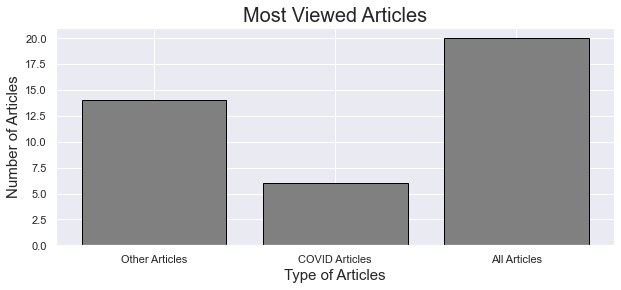

In [37]:
total = 0
covidTotal = 0
otherTotal = 0

# iterate through the list
for content in viewed7DaysQuery['results']:
    # add one for each article
    total += 1
    
    # if the article is about COVID
    if content['adx_keywords'].find('Coronavirus') != -1:
        # add one to covidTotal
        covidTotal += 1
    
    # if the article is not about COVID
    if content['adx_keywords'].find('Coronavirus') == -1:
        # add one to covidTotal
        otherTotal += 1

# create a list of type of articels
articles = ['Other Articles', 'COVID Articles', 'All Articles']
# create a list of number of articles
totalArticles = [otherTotal, covidTotal, total]

# plot a bar chart using two lists above
plt.bar(articles, totalArticles, color = 'gray', edgecolor = 'black')
# set up the plot title
plt.title('Most Viewed Articles', fontsize = 20)
# label x-axis
plt.xlabel('Type of Articles', fontsize = 15)
# label y-axis
plt.ylabel('Number of Articles', fontsize = 15)

## Sixth: Most Shared Articles in 7 Days on New York Times

In [38]:
shared7DaysQuery = requests.get('https://api.nytimes.com/svc/mostpopular/v2/shared/7/facebook.json?api-key=' + aKey).json()
# mostpopular/v2/shareded/7.json returns the most shared articles in 7 days

In [39]:
shared7DaysQuery

{'status': 'OK',
 'copyright': 'Copyright (c) 2021 The New York Times Company.  All Rights Reserved.',
 'num_results': 20,
 'results': [{'uri': 'nyt://article/263de010-85e4-5755-9834-cd75ccee8d8d',
   'url': 'https://www.nytimes.com/2021/12/08/us/schools-closed-fridays-remote-learning.html',
   'id': 100000008097933,
   'asset_id': 100000008097933,
   'source': 'New York Times',
   'published_date': '2021-12-08',
   'updated': '2021-12-10 01:11:19',
   'section': 'U.S.',
   'subsection': '',
   'nytdsection': 'u.s.',
   'adx_keywords': 'Coronavirus (2019-nCoV);Shutdowns (Institutional);E-Learning;Education (K-12);Parenting;Shortages;Teachers and School Employees;Detroit (Mich);Portland (Ore);Southfield (Mich);United States',
   'column': None,
   'byline': 'By Giulia Heyward',
   'type': 'Article',
   'title': 'Schools Are Closing Classrooms on Fridays. Parents Are Furious.',
   'abstract': 'Desperate to keep teachers, some districts have turned to remote teaching for one day a week — 

In [40]:
# check the keys for the dictionarie that contains all most shared articles for 7 days
shared7DaysQuery.keys()

dict_keys(['status', 'copyright', 'num_results', 'results'])

In [41]:
# check the keys for the dictionarie that contains information of one most shared article for 7 days
shared7DaysQuery['results'][0].keys()

dict_keys(['uri', 'url', 'id', 'asset_id', 'source', 'published_date', 'updated', 'section', 'subsection', 'nytdsection', 'adx_keywords', 'column', 'byline', 'type', 'title', 'abstract', 'des_facet', 'org_facet', 'per_facet', 'geo_facet', 'media', 'eta_id'])

In [42]:
# iterate through the list
for content in shared7DaysQuery['results']:
    
    # if the article is about COVID
    if content['adx_keywords'].find('Coronavirus') != -1:
        # print the title of each article
        print('\033[1m' + content['title'] + '\033[0m')
        print()
        # print the description facets of each article
        print(content['des_facet'])
        print()

Schools Are Closing Classrooms on Fridays. Parents Are Furious.

['Coronavirus (2019-nCoV)', 'Shutdowns (Institutional)', 'E-Learning', 'Education (K-12)', 'Parenting', 'Shortages', 'Teachers and School Employees']

The Coronavirus Attacks Fat Tissue, Scientists Find

['your-feed-science', 'Obesity', 'Coronavirus (2019-nCoV)', 'Weight', 'Immune System', 'Fat Tissue', 'Research']

New York City sets a sweeping vaccine mandate for all private employers.

['Coronavirus Omicron Variant', 'Coronavirus (2019-nCoV)', 'Vaccination and Immunization']

I’m Furious at the Unvaccinated

['Coronavirus (2019-nCoV)', 'Vaccination and Immunization', 'Rumors and Misinformation', 'Disease Rates']

The detection of Omicron in the U.S. expands to at least 16 states.

['Coronavirus Omicron Variant', 'Coronavirus (2019-nCoV)', 'Vaccination and Immunization']



In [43]:
# iterate through the list
for content in shared7DaysQuery['results']:
    
    # if the article is not about COVID
    if content['adx_keywords'].find('Coronavirus') == -1:
        # print the title of each article
        print('\033[1m' + content['title'] + '\033[0m')
        print()
        # print the description facets of each article
        print(content['des_facet'])
        print()

CNN Fires Chris Cuomo Amid Inquiry Into His Efforts to Aid His Brother

['News and News Media', 'Television', 'Sexual Harassment', 'Ethics and Official Misconduct']

Dramatic Day Reveals Details About the Parents of a School Shooting Suspect

['School Shootings and Armed Attacks', 'Oxford Charter Township, Mich, Shooting (2021)', 'Gun Control']

Scuba-Diving YouTuber Finds Car Linked to Teens Missing Since 2000

['Missing Persons', 'Computers and the Internet', 'Traffic Accidents and Safety', 'Diving and Divers', 'Sonar']

How to Save Your Knees Without Giving Up Your Workout

['Knees', 'Content Type: Service', 'Exercise', 'Research', 'Sports Injuries', 'Osteoarthritis', 'Muscles']

Why Does Coffee Make Me Poop?

['Caffeine', 'Diet and Nutrition', 'Bowels', 'Colon', 'Content Type: Service', 'Constipation', 'Digestive Tract', 'Coffee']

Review: ‘And Just Like That,’ It All Went Wrong

['Television']

Michael Steinhardt, Billionaire, Surrenders $70 Million in Stolen Relics

['Arts and An

Text(0, 0.5, 'Number of Articles')

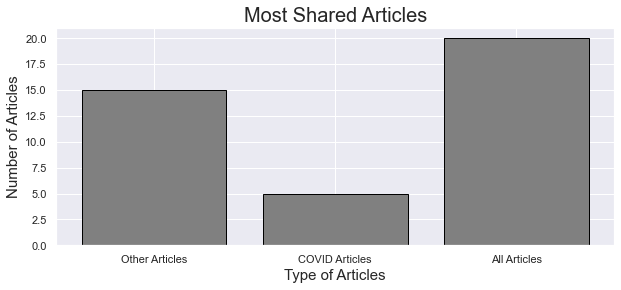

In [44]:
total = 0
covidTotal = 0
otherTotal = 0

# iterate through the list
for content in shared7DaysQuery['results']:
    # add one for each article
    total += 1
    
    # if the article is about COVID
    if content['adx_keywords'].find('Coronavirus') != -1:
        # add one to covidTotal
        covidTotal += 1
    
    # if the article is not about COVID
    if content['adx_keywords'].find('Coronavirus') == -1:
        # add one to covidTotal
        otherTotal += 1

# create a list of type of articels
articles = ['Other Articles', 'COVID Articles', 'All Articles']
# create a list of number of articles
totalArticles = [otherTotal, covidTotal, total]

# plot a bar chart using two lists above
plt.bar(articles, totalArticles, color = 'gray', edgecolor = 'black')
# set up the plot title
plt.title('Most Shared Articles', fontsize = 20)
# label x-axis
plt.xlabel('Type of Articles', fontsize = 15)
# label y-axis
plt.ylabel('Number of Articles', fontsize = 15)